Averages:
SVM Accuracy: 0.9186666666666664
SVM False Positive: 0.0035588702999805846
SVM False Negative: 0.30662750490581464
SVM F1 Score: 0.8124920467140827

Random Forest Accuracy: 0.9596274509803904
Random Forest False Positive: 0.003060671729149233
Random Forest False Negative: 0.17449484277877134
Random Forest F1 Score: 0.8975654628914966

KNN Accuracy: 0.9432941176470575
KNN False Positive: 0.0035397458044165836
KNN False Negative: 0.23110417514174775
KNN F1 Score: 0.86201910816118

XGBoost Accuracy: 0.9620784313725476
XGBoost False Positive: 0.005436685061644517
XGBoost False Negative: 0.1571934148946846
XGBoost F1 Score: 0.9028766554345246



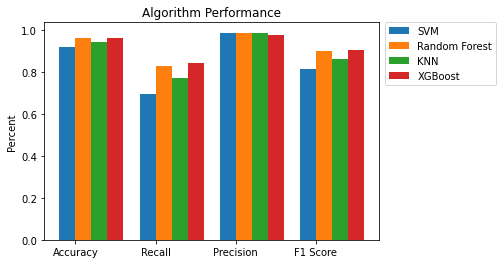

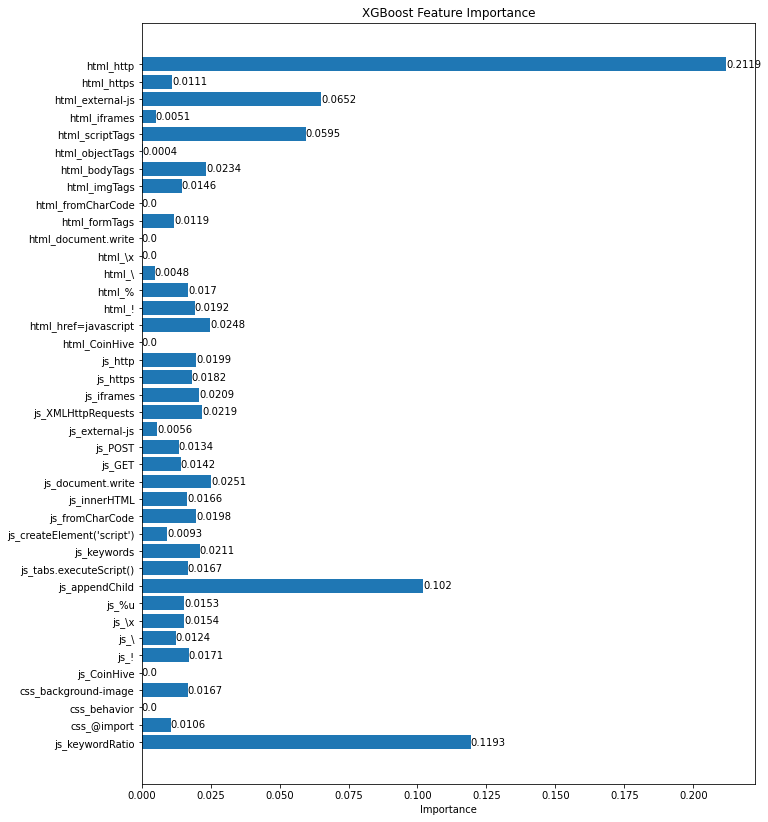

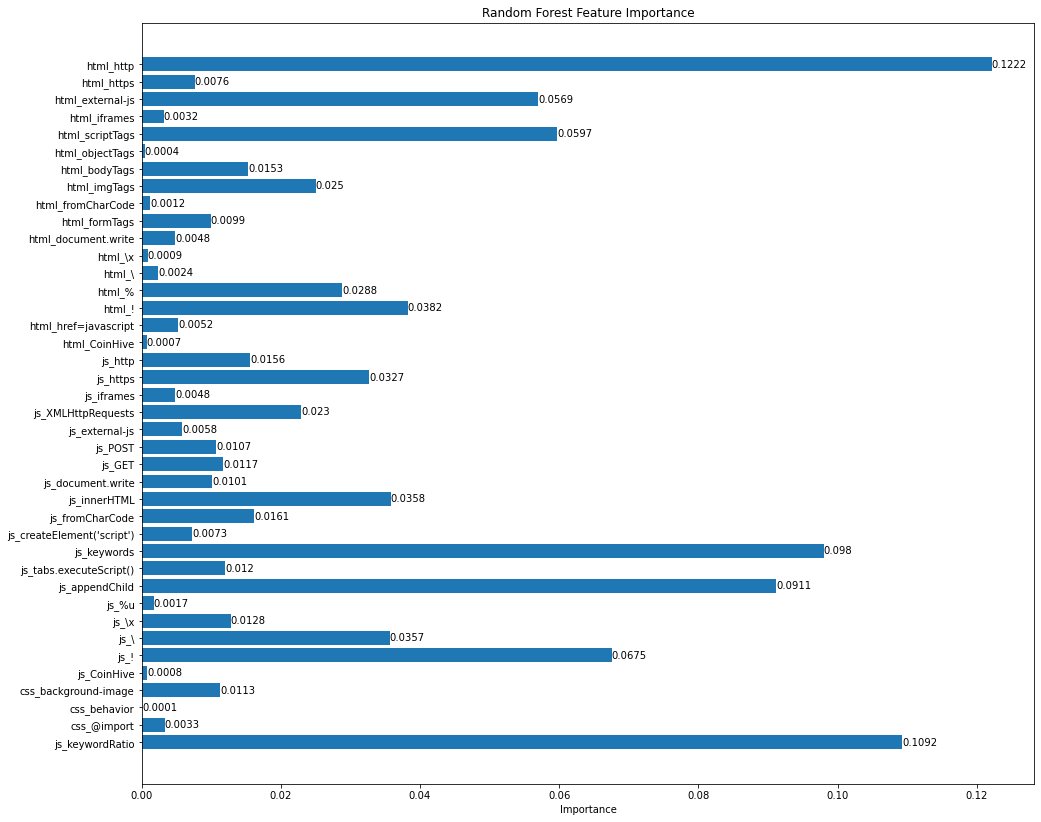

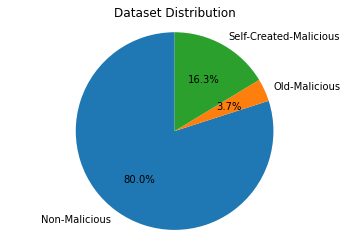

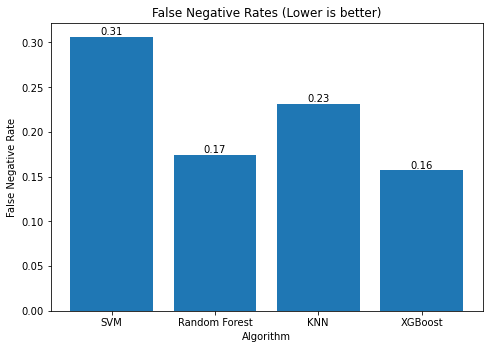

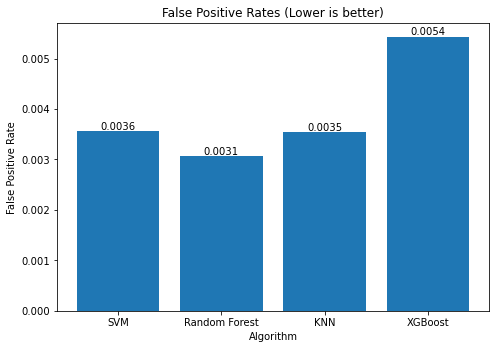

In [3]:
# Group Test
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt


import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)



def falsePositivePercent(Y_test, Y_prediction):
    trueNegative = 0
    falsePositive = 0
    
    for i in range(len(Y_test)):
        if Y_test[i] == 0:
            trueNegative += 1
        if Y_prediction[i] == 1 and Y_test[i] == 0:
            falsePositive += 1
            
    FP_percent = falsePositive / (falsePositive + trueNegative)
    return FP_percent

def falseNegativePercent(Y_test, Y_prediction):
    falseNegative = 0
    truePositive = 0
    
    for i in range(len(Y_test)):
        if Y_test[i] == 1:
            truePositive += 1
        if Y_test[i] == 1 and Y_prediction[i] == 0:
            falseNegative += 1
            
    FN_percent = falseNegative / (falseNegative + truePositive)
    return FN_percent

def precisionPercent(Y_test, Y_prediction):
    truePositive = 0
    falsePositive = 0
    
    for i in range(len(Y_test)):
        if Y_test[i] == 1:
            truePositive += 1
        if Y_test[i] == 0 and Y_prediction[i] == 1:
            falsePositive += 1
            
    precision = truePositive / (truePositive + falsePositive)
    return precision
            
    
def recallPercent(Y_test, Y_prediction):
    truePositive = 0
    falseNegative = 0
    
    for i in range(len(Y_test)):
        if Y_test[i] == 1:
            truePositive += 1
        if Y_test[i] == 1 and Y_prediction[i] == 0:
            falseNegative += 1

    if truePositive != 0:
        recall = truePositive / (truePositive + falseNegative)
        return recall
    return 1
    
    
def f1Score(Y_test, Y_prediction):
    precision = precisionPercent(Y_test, Y_prediction)
    recall = recallPercent(Y_test, Y_prediction)
    
    f1 = 2 * (precision * recall) / (precision + recall) 
    
    return f1

def sumList(theList):
    total = 0
    for num in theList:
        total += num
    return total

def averageList(theList, iterations):
    length = len(theList[0])
    features_average_list = []
    for i in range(length):
        features_average_list.append(0)
    
    for item in theList:
        for i in range(length):
            features_average_list[i] += item[i]
    for i in range(length):
        features_average_list[i] = features_average_list[i] / iterations
        
    return features_average_list
    
    




data = pd.read_csv("normalized_data12.csv")
nameColumn = data.pop("name")
idColumn = data.pop("id")

Y = data["isMalicious"].values
Y = Y.astype("float")

X = data.drop(columns=["isMalicious"])
X = X.astype("float")

svm_accuracy_list = []
rf_accuracy_list = []
knn_accuracy_list = []
xg_accuracy_list = []

svm_FP_list = []
rf_FP_list = []
knn_FP_list = []
xg_FP_list = []

svm_FN_list = []
rf_FN_list = []
knn_FN_list = []
xg_FN_list = []

svm_f1_list = []
rf_f1_list = []
knn_f1_list = []
xg_f1_list = []

svm_features_list = []
rf_features_list = []
knn_features_list = []
xg_features_list = []

svm_precision_list = []
rf_precision_list = []
knn_precision_list = []
xg_precision_list = []

svm_recall_list = []
rf_recall_list = []
knn_recall_list = []
xg_recall_list = []


#X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

iterations = 300

for i in range(iterations):

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
    
    
    svm_model = LinearSVC(max_iter=1000)
    svm_model.fit(X_train, Y_train)
    svm_prediction = svm_model.predict(X_test)
    svm_accuracy = metrics.accuracy_score(Y_test, svm_prediction)
    svm_FP = falsePositivePercent(Y_test, svm_prediction)
    svm_FN = falseNegativePercent(Y_test, svm_prediction)
    svm_precision = precisionPercent(Y_test, svm_prediction)
    svm_recall = recallPercent(Y_test, svm_prediction)
    svm_f1 = f1Score(Y_test, svm_prediction)

    rf_model = RandomForestClassifier(n_estimators=10, random_state=None)
    rf_model.fit(X_train, Y_train)
    rf_prediction = rf_model.predict(X_test)
    rf_accuracy = metrics.accuracy_score(Y_test, rf_prediction)
    rf_FP = falsePositivePercent(Y_test, rf_prediction)
    rf_FN = falseNegativePercent(Y_test, rf_prediction)
    rf_precision = precisionPercent(Y_test, rf_prediction)
    rf_recall = recallPercent(Y_test, rf_prediction)
    rf_f1 = f1Score(Y_test, rf_prediction)

    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, Y_train)
    knn_prediction = knn_model.predict(X_test)
    knn_accuracy = metrics.accuracy_score(Y_test, knn_prediction)
    knn_FP = falsePositivePercent(Y_test, knn_prediction)
    knn_FN = falseNegativePercent(Y_test, knn_prediction)
    knn_precision = precisionPercent(Y_test, knn_prediction)
    knn_recall = recallPercent(Y_test, knn_prediction)
    knn_f1 = f1Score(Y_test, knn_prediction)
    
    xg_model = XGBClassifier()
    xg_model.fit(X_train, Y_train)
    xg_prediction = xg_model.predict(X_test)
    xg_accuracy = metrics.accuracy_score(Y_test, xg_prediction)
    xg_FP = falsePositivePercent(Y_test, xg_prediction)
    xg_FN = falseNegativePercent(Y_test, xg_prediction)
    xg_precision = precisionPercent(Y_test, xg_prediction)
    xg_recall = recallPercent(Y_test, xg_prediction)
    xg_f1 = f1Score(Y_test, xg_prediction)
    
    svm_accuracy_list.append(svm_accuracy)
    rf_accuracy_list.append(rf_accuracy)
    knn_accuracy_list.append(knn_accuracy)
    xg_accuracy_list.append(xg_accuracy)
    
    svm_FP_list.append(svm_FP)
    rf_FP_list.append(rf_FP)
    knn_FP_list.append(knn_FP)
    xg_FP_list.append(xg_FP)
    
    svm_FN_list.append(svm_FN)
    rf_FN_list.append(rf_FN)
    knn_FN_list.append(knn_FN)
    xg_FN_list.append(xg_FN)
    
    svm_f1_list.append(svm_f1)
    rf_f1_list.append(rf_f1)
    knn_f1_list.append(knn_f1)
    xg_f1_list.append(xg_f1)
    
    svm_precision_list.append(svm_precision)
    rf_precision_list.append(rf_precision)
    knn_precision_list.append(knn_precision)
    xg_precision_list.append(xg_precision)
    
    svm_recall_list.append(svm_recall)
    rf_recall_list.append(rf_recall)
    knn_recall_list.append(knn_recall)
    xg_recall_list.append(xg_recall)
    
    
    rf_features_list.append(rf_model.feature_importances_)
    xg_features_list.append(xg_model.feature_importances_)
    

# Calculating the Accuracy Average
svm_accuracy_average = sumList(svm_accuracy_list) / iterations
rf_accuracy_average = sumList(rf_accuracy_list) / iterations
knn_accuracy_average = sumList(knn_accuracy_list) / iterations
xg_accuracy_average = sumList(xg_accuracy_list) / iterations


# Calculating the False Positive Average
svm_FP_average = sumList(svm_FP_list) / iterations
rf_FP_average = sumList(rf_FP_list) / iterations
knn_FP_average = sumList(knn_FP_list) / iterations
xg_FP_average = sumList(xg_FP_list) / iterations

     
# Calculating the False Negative Average
svm_FN_average = sumList(svm_FN_list) / iterations
rf_FN_average = sumList(rf_FN_list) / iterations
knn_FN_average = sumList(knn_FN_list) / iterations
xg_FN_average = sumList(xg_FN_list) / iterations

    
# Calculating the F1 Score Average
svm_f1_average = sumList(svm_f1_list) / iterations
rf_f1_average = sumList(rf_f1_list) / iterations
knn_f1_average = sumList(knn_f1_list) / iterations
xg_f1_average = sumList(xg_f1_list) / iterations

# Calculating the Precision Average
svm_precision_average = sumList(svm_precision_list) / iterations
rf_precision_average = sumList(rf_precision_list) / iterations
knn_precision_average = sumList(rf_precision_list) / iterations
xg_precision_average = sumList(xg_precision_list) / iterations

# Calculating the Recall Average
svm_recall_average = sumList(svm_recall_list) / iterations
rf_recall_average = sumList(rf_recall_list) / iterations
knn_recall_average = sumList(knn_recall_list) / iterations
xg_recall_average = sumList(xg_recall_list) / iterations


# Calculating the Average List Importances
xg_features_average = averageList(xg_features_list, iterations)
rf_features_average = averageList(rf_features_list, iterations)
            

# Show all the Averages
print("Averages:")
print("SVM Accuracy: " + str(svm_accuracy_average))
print("SVM False Positive: " + str(svm_FP_average))
print("SVM False Negative: " + str(svm_FN_average))
print("SVM F1 Score: " + str(svm_f1_average))
print()
print("Random Forest Accuracy: " + str(rf_accuracy_average))
print("Random Forest False Positive: " + str(rf_FP_average))
print("Random Forest False Negative: " + str(rf_FN_average))
print("Random Forest F1 Score: " + str(rf_f1_average))
print()
print("KNN Accuracy: " + str(knn_accuracy_average))
print("KNN False Positive: " + str(knn_FP_average))
print("KNN False Negative: " + str(knn_FN_average))
print("KNN F1 Score: " + str(knn_f1_average))
print()
print("XGBoost Accuracy: " + str(xg_accuracy_average))
print("XGBoost False Positive: " + str(xg_FP_average))
print("XGBoost False Negative: " + str(xg_FN_average))
print("XGBoost F1 Score: " + str(xg_f1_average))
print()


# Show the Accuracy Graphs
N = 4
svm_means = (svm_accuracy_average, svm_recall_average, svm_precision_average, svm_f1_average)
rf_means = (rf_accuracy_average, rf_recall_average, rf_precision_average, rf_f1_average)
knn_means = (knn_accuracy_average, knn_recall_average, knn_precision_average, knn_f1_average)
xg_means = (xg_accuracy_average, xg_recall_average, xg_precision_average, xg_f1_average)

ind = np.arange(N)
width = 0.2
plt.bar(ind, svm_means, width, label='SVM')
plt.bar(ind + (1 * width), rf_means, width, label='Random Forest')
plt.bar(ind + (2 * width), knn_means, width, label="KNN")
plt.bar(ind + (3 * width), xg_means, width, label="XGBoost")
plt.ylabel("Percent")
plt.title("Algorithm Performance")

plt.xticks(ind + width / 2, ('Accuracy', 'Recall', 'Precision', 'F1 Score'))
#plt.legend(loc="best")
plt.legend(bbox_to_anchor=(1.35,1), loc="upper right", borderaxespad=0)
plt.show()


# Show Feature Graphs 
# XGBoost
fig, ax = plt.subplots(figsize=(11,14))
features = (X.columns)
y_pos = np.arange(len(features))
xg_score = xg_features_average

ax.barh(y_pos, xg_score, align="center")
ax.set_yticks(y_pos, labels=features)
ax.invert_yaxis()
ax.set_xlabel("Importance")
ax.set_title("XGBoost Feature Importance")

for i in range(len(features)):
    limited_float = round(xg_score[i], 4)
    plt.text(xg_score[i], i, limited_float, ha="left", va="center")

plt.show()

# Random Forest
fig, ax = plt.subplots(figsize=(16,14))
features = (X.columns)
y_pos = np.arange(len(features))
rf_score = rf_features_average

ax.barh(y_pos, rf_score, align="center")
ax.set_yticks(y_pos, labels=features)
ax.invert_yaxis()
ax.set_xlabel("Importance")
ax.set_title("Random Forest Feature Importance")

for i in range(len(features)):
    limited_float = round(rf_score[i], 4)
    plt.text(rf_score[i], i, limited_float, ha="left", va="center")
    
plt.show()




# Show the Dataset Distribution
labels = "Non-Malicious", "Old-Malicious","Self-Created-Malicious"
sizes = [79.946, 3.718, 16.33] #Non-Malicious=602, Old-Malicious=28, Self-Created=123

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.title("Dataset Distribution")
plt.show()



# Show the False Negative Comparison
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ["SVM", "Random Forest", "KNN", "XGBoost"]
FN_percents = [svm_FN_average, rf_FN_average, knn_FN_average, xg_FN_average]
ax.bar(types, FN_percents)
plt.title("False Negative Rates (Lower is better)")
plt.xlabel("Algorithm")
plt.ylabel("False Negative Rate")

for i in range(len(FN_percents)):
    limited_float = round(FN_percents[i], 2)
    plt.text(i, FN_percents[i], limited_float, ha="center", va="bottom")

plt.show()




# Show the False Positive Comparison
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ["SVM", "Random Forest", "KNN", "XGBoost"]
FP_percents = [svm_FP_average, rf_FP_average, knn_FP_average, xg_FP_average]
ax.bar(types, FP_percents)
plt.title("False Positive Rates (Lower is better)")
plt.xlabel("Algorithm")
plt.ylabel("False Positive Rate")

for i in range(len(FP_percents)):
    limited_float = round(FP_percents[i], 4)
    plt.text(i, FP_percents[i], limited_float, ha="center", va="bottom")

plt.show()




# Show the ROC Curve
# fpr, tpr, _ = metrics.roc_curve(Y_test, xg_prediction)
# plt.plot(fpr, tpr)

# fpr, tpr, _ = metrics.roc_curve(Y_test, rf_prediction)
# plt.plot(fpr, tpr)
# fpr, tpr, _ = metrics.roc_curve(Y_test, svm_prediction)
# plt.plot(fpr, tpr)
# plt.ylabel("True Positive Rate")
# plt.xlabel("False Positive Rate")
# plt.show()
####################################################################################################################


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt



